# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [2]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_train= X_train.astype('float')/255.  #normalize data after converting from int to float
X_test= X_test.astype('float')/255.
X_train= np.reshape(X_train, (60000, 784))
X_test= np.reshape(X_test, (10000,784))

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [4]:
X_train_noisy= X_train + np.random.rand(60000, 784)*0.9 #rand generates a random value between 0 and 1
X_test_noisy= X_test + np.random.rand(10000, 784)*0.9
X_train_noisy= np.clip(X_train_noisy, 0., 1.)#clip values to set them between 0 and 1
X_test_noisy= np.clip(X_test_noisy, 0., 1.)#dot indicates floating point values

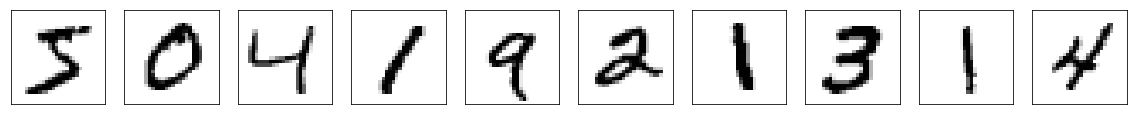

In [5]:
def plot(x, p, labels=False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)#subplot starts from 1
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))# index of the maximum value in v
    plt.show()
    
plot(X_train, None)

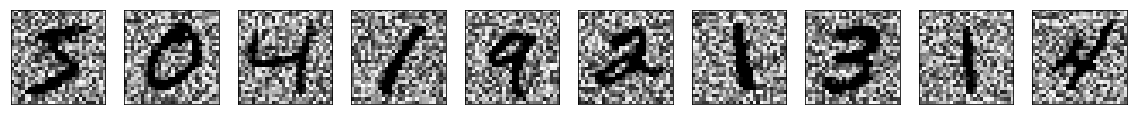

In [6]:
plot(X_train_noisy, None)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [7]:
classifier= Sequential([
    Dense(256, activation='relu',input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
#we are using above loss function since our labels are not one hot encoded
classifier.fit(X_train, y_train, batch_size= 512, epochs=3)
#512 to speed up training  up->training model

Epoch 1/3
60000/60000 [==============================] - 5s 89us/step - loss: 0.4266 - acc: 0.8844
Epoch 2/3
60000/60000 [==============================] - 5s 82us/step - loss: 0.1520 - acc: 0.9556
Epoch 3/3
60000/60000 [==============================] - 5s 82us/step - loss: 0.1002 - acc: 0.9701


In [8]:
loss, acc= classifier.evaluate(X_test, y_test)
print(acc)

10000/10000 [==============================] - 1s 77us/step
0.9679


In [9]:
loss, acc= classifier.evaluate(X_test_noisy, y_test)
print(acc)

10000/10000 [==============================] - 1s 70us/step
0.2089


## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

Auto-encoding is an algorithm to help reduce dimensionality of data.
This algorithm to reduce dimensionality of data, as learned from the data itself, can also be used for reducing noise in the data.
Auto-encoding can be used for lossy data compression where the compression is dependent on the given data itself.

In [10]:
#autoencoder to denoise data
#if there are less nodes in dense layer model will work similar to principal component analysis and will 
#force the moel to learn more important characteristics from dataset and focus only on that
input_image= Input(shape=(784,))#take something with 784 features
encoded= Dense(64, activation='relu')(input_image)#reduce dimensionality & force above thing to fully 
#connected layer
decoded= Dense(784, activation='sigmoid')(encoded)#expand it back to 784 features/values
#above autoencoder when we train it learns to focus only on important things and is able to denoise things
#which are not important. in sigmoid most values will converge to 0 or 1

autoencoder= Model(input_image, decoded)#(input,output)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [11]:
#noisy images as input and original images as labels
autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=512, validation_split=0.2, verbose=False,
               callbacks=[
                EarlyStopping(monitor='val_loss', patience=5),
                LambdaCallback(on_epoch_end= lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ ') )
                       ]
               )
#if validation loss does not decrease for 5 epochs then model will stop training; e,l=epoch end, basic log
print(' _ ')
print('Training is complete!')

0.255 _ 0.221 _ 0.194 _ 0.177 _ 0.164 _ 0.156 _ 0.149 _ 0.143 _ 0.138 _ 0.134 _ 0.131 _ 0.127 _ 0.124 _ 0.122 _ 0.120 _ 0.118 _ 0.117 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.102 _ 0.103 _ 0.103 _ 0.102 _ 0.102 _ 0.103 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _  _ 
Training is complete!


## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [12]:
predictions= autoencoder.predict(X_test_noisy) 

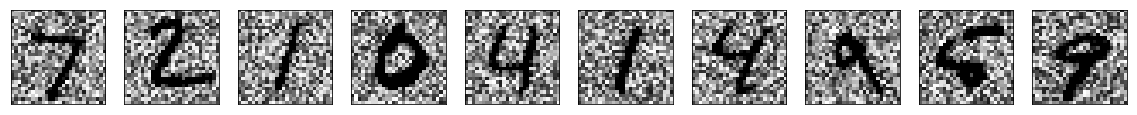

In [13]:
plot(X_test_noisy, None)

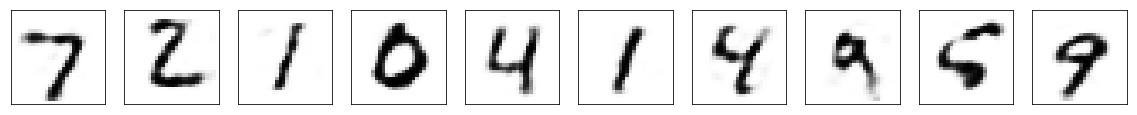

In [14]:
plot(predictions, None)

In [15]:
#performance can be improved by using convolution neural network in autoencoder
loss, acc= classifier.evaluate(predictions, y_test)
print(acc)

10000/10000 [==============================] - 1s 123us/step
0.9515


## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [16]:
input_image= Input(shape=(784,))
x= autoencoder(input_image)#denoised image
y= classifier(x)

denoise_and_classify= Model(input_image, y)
#creates denoise and classify model

In [17]:
predictions= denoise_and_classify.predict(X_test_noisy)

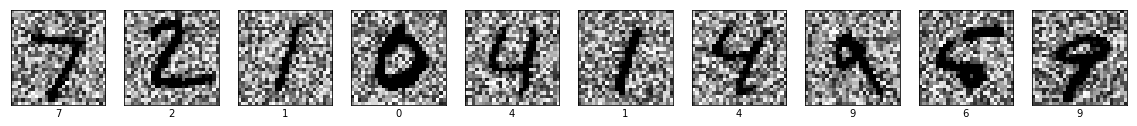

In [18]:
plot(X_test_noisy, predictions, True)

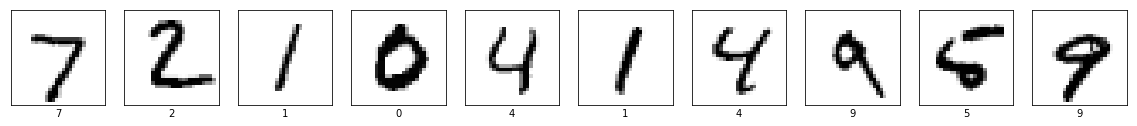

In [19]:
plot(X_test, to_categorical(y_test), True)#1 hot encoding on y_test

model = tf.keras.models.Sequential([
    Dense(4, activation="relu", input_shape=(32,)),
    Dense(32, activation="sigmoid")
]) is an autoencoder

If you're working with a classification problem with 10 classes, and the labels are given in numeric values from 0 to 9 - 
i.e. first class is represented by 0, second class by 1 and so on, what kind of loss function would you use?
Sparse categorical cross entropy
Categorical cross entropy after one-hot encoding labels